### StackOverFLowSearchEngine


### Problem

Building a search engine based on StackOverflow questions, the search results should include the semantic meaning https://meta.stackexchange.com/questions/138356/how-do-i-download-stack-overflows-data think of scalable architecture and  to reduce the time to return the results.

### Objectives

1) Find top 10 posts which are more similar or sementically similar to the given query posts


### Constraints

1) Low latency

2) Scalability

### Datasets Used

1.WindowsPhone 
2.Sports 
3.Robotics 
4.History 
5.Economics 
6.EarthScience 
7.Chemistry 
8.Biology 
9.Aviation 
10.DBA 

### Approach

1.Data is in XML format for all the Datasets.So converting XML data to tabular format and storing the results in .CSV file

2.Combining all the data from different datasets into single Dataset.Doing the preprocessing of the data to remove stopwords,decontracting the strings,Limmitization and removing other punctuation symbols

3.Taking title and Questions as primary feature ,finding the Cosine Similarity to get all posts which gives semantic similarity to the given Query Post

4.Using Pretrained models UniversalSentenceEncoder,Sbert,ELMO for the word embeddings(Vector representation) for all the Title and Questions data

5.Checking performance of Pretrained Models to get the better results.


### Pretrained Models used in Case Study

1.UniversalSentence Encoder

2.Sbert(Sentence transformers)

3.Embeddings from Language Models (ELMo)

### Experimentation

1.Stacking the Sbert ,ELMO models And Universal sentence Encoder models

2.Combining the word embeddings from SBert ,ELMO model,USE and getting the Similar posts which is having semantic similarity with other Posts in the Dataset

In [10]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import datetime as dt
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.preprocessing import OneHotEncoder

In [11]:
import warnings
warnings.filterwarnings('ignore')
from scipy import spatial
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import time
import tqdm.notebook as tq
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to C:\Users\Reddivari
[nltk_data]     Lalitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Reddivari
[nltk_data]     Lalitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Creating the Post Excel file from the posts.xml
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Posts.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [3]:
#Aviation Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\aviation\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Aviation.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [4]:
#Biology Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\biology\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\biology.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [5]:
#Chemistry Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\chemistry\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Chemistry.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [8]:
#Economics Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\economics\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\economics.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [ ]:
#Earthscience Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\earthscience\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\earthscience.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [9]:
#Earthscience Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\history\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\history.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [10]:
#robotics Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\robotics\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\robotics.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [11]:
#Sports Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\sports\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\sports.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



In [12]:
#WindowsPhone Dataset
xmlfile = r'C:\Users\Reddivari Lalitha\Downloads\CaseStudayRawData\windowsphone\Posts.xml'
element_tree = ET.parse(xmlfile)
root =element_tree.getroot()
Data_ID =[]
PostTypeID=[]
Score =[]
ViewCount= []
Body =[]
Title =[]
Tags =[]
AnswerCount=[]
CommentCount =[]
FavoriteCount =[]
AcceptedAnswerId=[]
PostTypeId= []
ParentId =[]
for i in  root.iter('row'):
    Data_ID.append(i.attrib['Id'])
    PostTypeID.append(i.attrib['PostTypeId'])
    Score.append(i.attrib['Score'])
    VC = i.find('ViewCount')
    
    if 'ViewCount' in i.attrib:
        ViewCount.append(i.attrib['ViewCount'])
        
    else:    
        ViewCount.append(1)
        
    Body.append(i.attrib['Body'])
    
    if 'ParentId' in i.attrib:
        
        ParentId.append(i.attrib['ParentId'])
    else:    
        ParentId.append("1")
    
    #Default title is DefaultTitle
    
    
    if 'Title' in i.attrib:
        
        Title.append(i.attrib['Title'])
    else:    
        Title.append("DefaultTitle")
     
    #Default Answer Count is 1
 
    if 'AnswerCount' is i.attrib:
        AnswerCount.append(i.attrib['AnswerCount'])
        
    else:  
        AnswerCount.append(1)
    
    
    if 'CommentCount' is i.attrib:
        CommentCount.append(i.attrib['CommentCount'])
        
    else:  
        CommentCount.append(1)
    
    #Default favorite Count is 1
    
    if 'FavoriteCount' is i.attrib:
        FavoriteCount.append(i.attrib['FavoriteCount'])
        
    else:  
        FavoriteCount.append(1)
    
    #Making Default AcceptedAnswerID is 1
    
    
    if 'AcceptedAnswerId' is i.attrib:
        AcceptedAnswerId.append(i.attrib['AcceptedAnswerId'])
        
    else:
        AcceptedAnswerId.append(1)
        
    PostTypeId.append(i.attrib['PostTypeId'])
    
    
    
Tags_DataFrame=pd.DataFrame(list(zip(Data_ID,PostTypeId,Title,Body,Score,ViewCount,AnswerCount,AcceptedAnswerId,ParentId,FavoriteCount,CommentCount
                                     
                                    )),columns =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount'])

writer = pd.ExcelWriter(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\windowsphone.xlsx', engine='xlsxwriter')
Tags_DataFrame.to_excel(writer,sheet_name='Posts',index=False)
writer.save()



### Exploratary Data analysis

In [30]:
#Datasetlist to iterate over all Datasets
DatasetList =['Windowsphone','sports','robotics','history','economics','earthscience','Chemistry','biology','Aviation','DatabaseAdmin']

#### Unbalanced Datasets

In [ ]:
Windowsphone_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\windowsphone.xlsx',index_col =False)
Sports_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\sports.xlsx',index_col =False)
Robotics_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\robotics.xlsx',index_col =False)
History_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\history.xlsx',index_col =False)
Economics_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\economics.xlsx',index_col =False)
Earthscience_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\earthscience.xlsx',index_col =False)
Chemistry_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Chemistry.xlsx',index_col =False)
Biology_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\biology.xlsx',index_col =False)
Aviation_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Aviation.xlsx',index_col =False)
DBA_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\DatabaseAdmin.xlsx',index_col =False)

In [95]:
#Number of columns in each dataset and Length of the  dataset
DatasetList =[Windowsphone_Dataset,Sports_Dataset,Robotics_Dataset,History_Dataset,Economics_Dataset,Earthscience_Dataset,Chemistry_Dataset,Biology_Dataset,Aviation_Dataset,DBA_Dataset]
Length_Dataset =[]
for i in range(len(DatasetList)):
    print("Number of Columns in  {0} is:{1} and lenghth {2} ".format(i,len(DatasetList[i].columns),len(DatasetList[i])))
    Length_Dataset.append(len(DatasetList[i]))

Number of Columns in  0 is:11 and lenghth 8396 
Number of Columns in  1 is:11 and lenghth 13441 
Number of Columns in  2 is:11 and lenghth 13193 
Number of Columns in  3 is:11 and lenghth 36081 
Number of Columns in  4 is:11 and lenghth 22327 
Number of Columns in  5 is:11 and lenghth 12144 
Number of Columns in  6 is:11 and lenghth 76223 
Number of Columns in  7 is:11 and lenghth 53351 
Number of Columns in  8 is:11 and lenghth 56367 
Number of Columns in  9 is:11 and lenghth 197631 


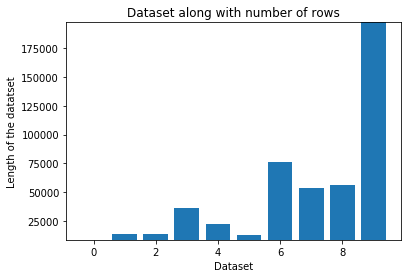

In [42]:
Dataset_lists =[0,1,2,3,4,5,6,7,8,9]
plt.ylim(min(Length_Dataset),max(Length_Dataset))
plt.bar(Dataset_lists,Length_Dataset)
plt.xlabel("Dataset")
plt.ylabel("Length of the datatset")
plt.title("Dataset along with number of rows")
plt.show()

### Observations:
1.All datasets having equal number of columns 11.

2.The length of each dataset is different and DBA dataset having more data compared to other datasets.

3.WindowsPhone dataset having very less data.

4.The data is imbalanced across all datasets

#### Balancing Datasets

In [ ]:
for i in range(len(DatasetList)):
    SourceDirectoryName =r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy'
    DestinationDirectoryName =r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet'
    Fullpath =SourceDirectoryName+'\\'+DatasetList[i] +'.xlsx'
    Posts =pd.read_excel(Fullpath,Sheet_Name ='Posts')
    Posts =Posts.sample(n=8000)
    Posts['Topic']=DatasetList[i]
    DestinationPath=DestinationDirectoryName+'\\'+DatasetList[i] +'.xlsx'
    writer=pd.ExcelWriter(DestinationPath, engine='xlsxwriter')
    Posts.to_excel(writer,sheet_name='Posts',index=False)
    writer.save()

In [14]:
Windowsphone_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\windowsphone.xlsx',index_col =False)
Sports_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\sports.xlsx',index_col =False)
Robotics_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\robotics.xlsx',index_col =False)
History_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\history.xlsx',index_col =False)
Economics_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\economics.xlsx',index_col =False)
Earthscience_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\earthscience.xlsx',index_col =False)
Chemistry_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\Chemistry.xlsx',index_col =False)
Biology_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\biology.xlsx',index_col =False)
Aviation_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\Aviation.xlsx',index_col =False)
DBA_Dataset =pd.read_excel(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet\DatabaseAdmin.xlsx',index_col =False)

In [24]:
DatasetList =[Windowsphone_Dataset,Sports_Dataset,Robotics_Dataset,History_Dataset,Economics_Dataset,Earthscience_Dataset,Chemistry_Dataset,Biology_Dataset,Aviation_Dataset,DBA_Dataset]
Length_Dataset =[]
for i in range(len(DatasetList)):
    print("Number of Columns in  {0} is:{1} and length {2} ".format(i,len(DatasetList[i].columns),len(DatasetList[i])))
    Length_Dataset.append(len(DatasetList[i]))       

Number of Columns in  0 is:12 and length 8000 
Number of Columns in  1 is:12 and length 8000 
Number of Columns in  2 is:12 and length 8000 
Number of Columns in  3 is:12 and length 8000 
Number of Columns in  4 is:12 and length 8000 
Number of Columns in  5 is:12 and length 8000 
Number of Columns in  6 is:12 and length 8000 
Number of Columns in  7 is:12 and length 8000 
Number of Columns in  8 is:12 and length 8000 
Number of Columns in  9 is:12 and length 8000 


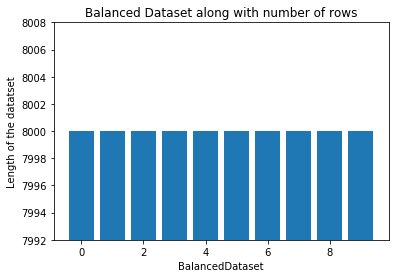

In [26]:
Dataset_lists =[0,1,2,3,4,5,6,7,8,9]
plt.ylim(min(Length_Dataset),max(Length_Dataset))
plt.bar(Dataset_lists,Length_Dataset)
plt.xlabel("BalancedDataset")
plt.ylabel("Length of the datatset")
plt.title("Balanced Dataset along with number of rows")
plt.show()

#### Observations

1.Above bar plot shows the balanced datasets and each dataset having 8000 records for further process.

In [13]:
#https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe
def WordCloudFunction(DatasetName,DataSet):
    #Dataset=DataSet.drop(columns=DataSet.columns[(DataSet == 'defaulttitle').any()])
    Dataset=DataSet.drop(DataSet.loc[DataSet['Title'] =='DefaultTitle'].index, inplace=True)
    Title_words = ' '
    Tokens_List=[]
    stopwords = set(STOPWORDS)  
    for val in DataSet.Title: 
        # typecaste each val to string
        val = str(val).lower() 
        # split the value 
        tokens = val.split() 
        Tokens_List.append(tokens)
        
    # Converts each token into lowercase 
    for i in range(len(Tokens_List)): 
        Tokens_List[i] = Tokens_List[i] 

    for words in Tokens_List:
        for word in words:
            Title_words = Title_words + word + ' '


    wordcloud = WordCloud(width =900, height = 500,
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 7).generate(Title_words) 
    
    print("Dataset :",DatasetName)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    
    

### WordCloud Plot for Each Dataset

Dataset : WindowsPhone


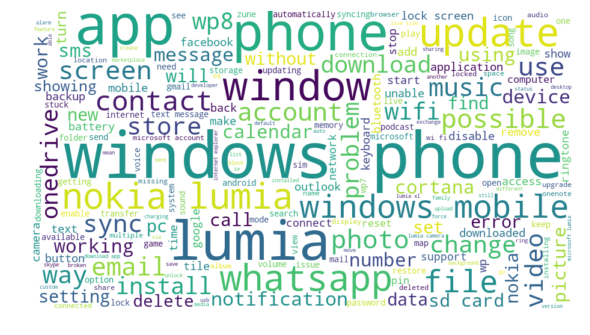

Dataset : Sports


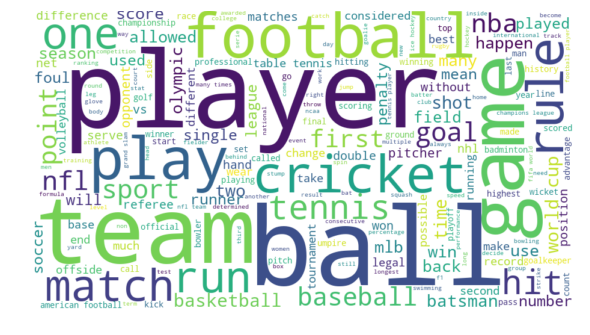

Dataset : Robotics


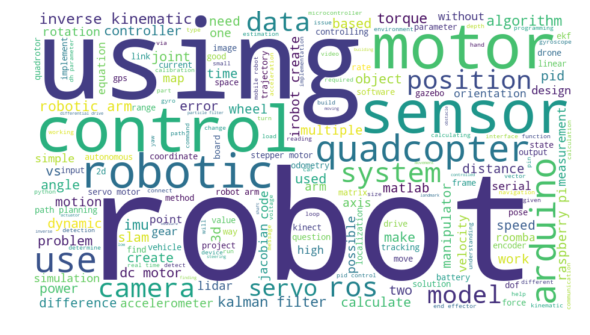

In [15]:
WordCloudFunction("WindowsPhone",Windowsphone_Dataset)
WordCloudFunction("Sports",Sports_Dataset)
WordCloudFunction("Robotics",Robotics_Dataset)

Dataset : History


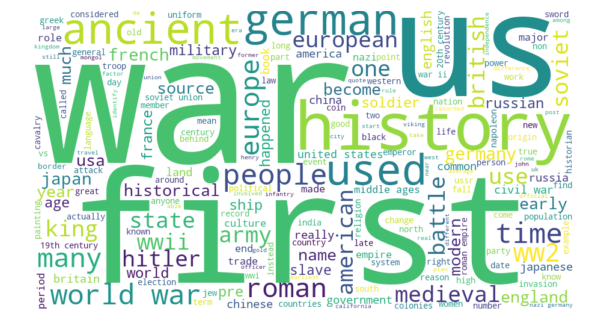

Dataset : Economics


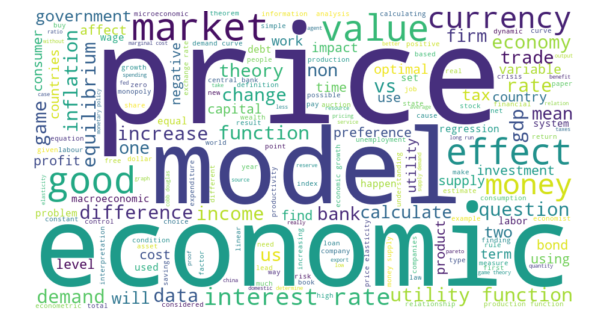

Dataset : Earthscience


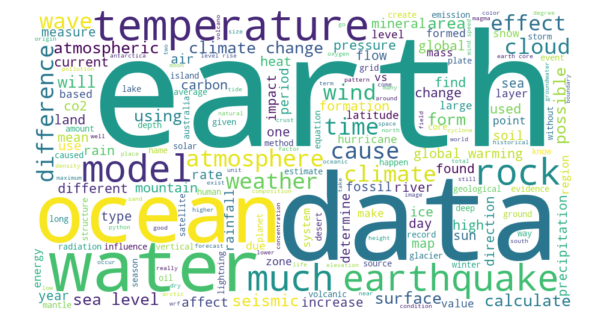

In [16]:
WordCloudFunction("History",History_Dataset)
WordCloudFunction("Economics",Economics_Dataset)
WordCloudFunction("Earthscience",Earthscience_Dataset)

Dataset : Chemistry


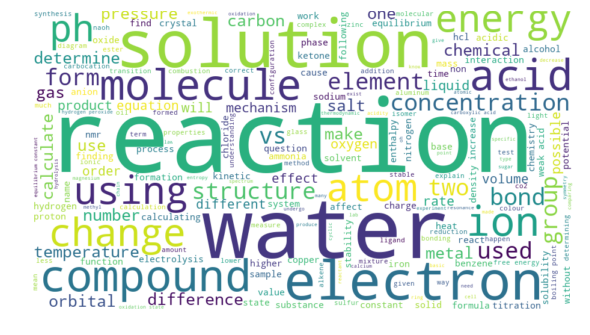

Dataset : Biology


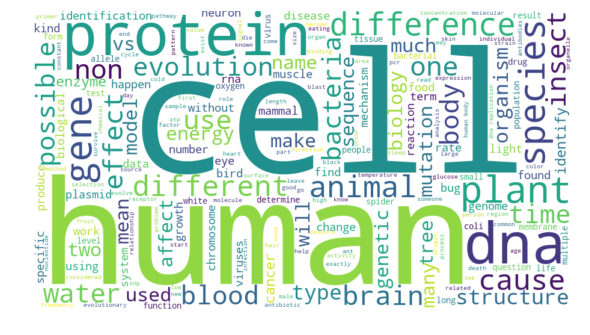

In [17]:
WordCloudFunction("Chemistry",Chemistry_Dataset)
WordCloudFunction("Biology",Biology_Dataset)

Dataset : Aviation


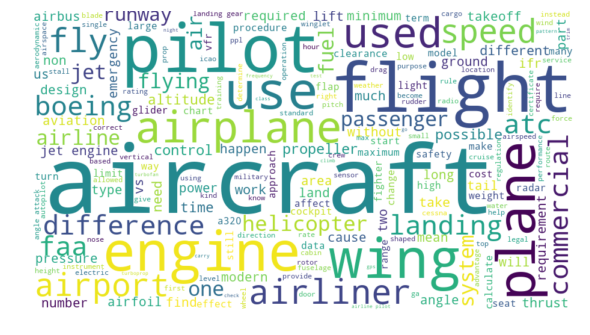

Dataset : DBA


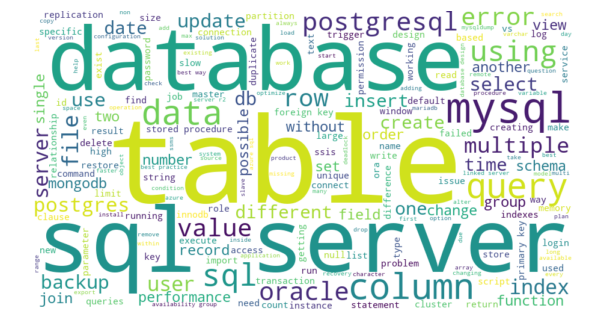

In [18]:
WordCloudFunction("Aviation",Aviation_Dataset)
WordCloudFunction("DBA",DBA_Dataset)

### Preparing the Dataset

In [159]:
#Making single dataset using all fields related data
import os
Fields =['ID','PostTypeId','Title','Body','Score','ViewCount','AnswerCount','AcceptedAnswerId','ParentId'
                                                ,'FavoriteCount','CommentCount','Topic']
Dataset =pd.DataFrame()
Questions_Dataframe =pd.DataFrame()
Answers_Dataframe =pd.DataFrame()

for i in range(len(DatasetList)):
    DirectoryName =r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataSet'
    Fullpath =DirectoryName+'\\'+DatasetList[i] +'.xlsx'
    Posts =pd.read_excel(Fullpath,Sheet_Name ='Posts')
    #Taking only Questions from the Posts excel file in each dataset
    Questions =Posts.where(Posts['PostTypeId']==1)
    #Dropping Null Values in Questions Data
    #Questions =Questions.dropna()
    Questions=Questions.drop(['PostTypeId','ViewCount','AnswerCount','ParentId','FavoriteCount','AcceptedAnswerId',
                         'CommentCount','Score'],axis =1)
    Questions =Questions.dropna()
    
    Questions=Questions.drop_duplicates(subset ='ID')
    
    Questions =Questions.drop(['ID'],axis =1)
    
    Questions_Dataframe=Questions_Dataframe.append(Questions,ignore_index =True)
    
    
  
    Answers =Posts.where(Posts['PostTypeId']==2)
    #Dropping Null Values in Answers Dataset
    #Answers =Answers.dropna()
    Answers=Answers.drop(['PostTypeId','Title','AnswerCount','FavoriteCount','AcceptedAnswerId',
                         'CommentCount','AcceptedAnswerId','ViewCount','Score','ID'],axis =1)
    
    #Answers=Answers.groupby(['ParentId'])['Body'].sum()
    
    Answers =Answers.dropna()
    

    Answers_Dataframe=Answers_Dataframe.append(Answers,ignore_index =True)
    

In [ ]:
Questions_Dataframe =Questions_Dataframe.rename(columns ={"Body":"Questions"})
Questions_Dataframe.to_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Questions.csv')

In [ ]:
print(len(Questions_Dataframe))

In [171]:
Answers_Dataframe =Answers_Dataframe.rename(columns ={"Questions":"Answers"})
Answers_Dataframe.to_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Answers.csv')
print(Answers_Dataframe.head(5))

                                             Answers  ParentId         Topic
0  <p>If an app is too large (over 50 MB, I belie...   11359.0  Windowsphone
1  <p>Go to WhatsApp chat delete the chat data is...    9075.0  Windowsphone
2  <p>Skype on WP now supports signing-in with a ...    5496.0  Windowsphone
3  <ol>\n<li>Go to date and time settings</li>\n<...    3028.0  Windowsphone
4  <p>As far as I know, the blinking icon simply ...   12515.0  Windowsphone


In [ ]:
#Dropping unused columns from the Dataframe
Dataset=Dataset.drop(['Score_x','ID_y','ParentId'],axis =1)

In [141]:
Questions_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame

In [50]:
#Renaming the Columns in dataset as Questions and Answers
Dataset =Dataset.rename(columns ={"Body_x":"Questions","Body_y":"Answers"})

In [56]:
Dataset.head(5)

,Title,Questions,Topic,Answers
0,How to delete a file?,<p>I have sent a file that is not supported by...,Windowsphone,<p>Go to PDF Reader (whatever app that you are...
1,how to connect to my pc internet with my nokia...,<p>When my nokia lumia 1020 is connected to my...,Windowsphone,"<p>That depends on how you mean ""connected"" --..."
2,How do I close the Games or Camera apps on Nok...,<p>The Lumia 535 doesn't have a physical Back ...,Windowsphone,<p>In order to show the virtual button bar in ...
3,"Are Windows Phone 8.1 GDR 2, Windows Phone 8.1...","<p>As the question says, are the following the...",Windowsphone,"<p><a href=""http://lumiaconversations.microsof..."
4,How well does it work with Yahoo email (Not Pop3),<p>I'm currently using an <em>iPhone 5</em> wi...,Windowsphone,<p>I'm not using <strong>Yahoo! Mail</strong> ...


In [54]:
Dataset.to_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\BalancedDataset.csv')

In [76]:
#Grouping Dataset using ID column
Data =Dataset.groupby(['ID'])

In [73]:
#Summing the Answer score for each Question
Dataset['AnswerScore'] =Dataset.groupby(['ID'])['AnswerScore'].sum()

In [ ]:
#Concatenating all the answers related to single question 
Dataset['Answers'] =Dataset.groupby(['ID'])['Answers'].apply(lambda x:';'.join(x))

In [74]:
#Dropping the Duplicates from the Dataframe
Dataset =Dataset.drop_duplicates(subset ='ID')

In [302]:
#Loading dataset into CSV Files
Dataset.to_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Data.csv')

In [3]:
Dataset =pd.read_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Questions.csv',index_col =False)

In [4]:
Dataset.head(5)

,Unnamed: 0,Title,Questions,Topic
0,0,How to delete a file?,<p>I have sent a file that is not supported by...,Windowsphone
1,1,how to connect to my pc internet with my nokia...,<p>When my nokia lumia 1020 is connected to my...,Windowsphone
2,2,Stuck in a reboot loop while updating to W10 (...,"<p>After downloading the last W10 Preview, my ...",Windowsphone
3,3,How do I close the Games or Camera apps on Nok...,<p>The Lumia 535 doesn't have a physical Back ...,Windowsphone
4,4,"Are Windows Phone 8.1 GDR 2, Windows Phone 8.1...","<p>As the question says, are the following the...",Windowsphone


In [6]:
#Renaming the unnamed column
Dataset.rename( columns={'Unnamed: 0':'ID'}, inplace=True )

In [8]:
#Checking for not null values in the Dataset
Dataset.isna().sum()

ID           0
Title        0
Questions    0
Topic        0
dtype: int64

In [9]:
#Cheking for Duplicates
Dataset.duplicated().any()

False

In [10]:
#Checking the statistics of the Dataframe
Dataset.describe()

,ID
count,32179.000000
mean,16089.000000
std,9289.421493
min,0.000000
25%,8044.500000
50%,16089.000000
75%,24133.500000
max,32178.000000


In [20]:
print(Dataset.head(5))

   ID                                              Title  \
0   0                              How to delete a file?   
1   1  how to connect to my pc internet with my nokia...   
2   2  Stuck in a reboot loop while updating to W10 (...   
3   3  How do I close the Games or Camera apps on Nok...   
4   4  Are Windows Phone 8.1 GDR 2, Windows Phone 8.1...   

                                           Questions         Topic  
0  <p>I have sent a file that is not supported by...  Windowsphone  
1  <p>When my nokia lumia 1020 is connected to my...  Windowsphone  
2  <p>After downloading the last W10 Preview, my ...  Windowsphone  
3  <p>The Lumia 535 doesn't have a physical Back ...  Windowsphone  
4  <p>As the question says, are the following the...  Windowsphone  


### Cleaning and preprocessing of Data

In [21]:
import re
#Below function used to remove the html tags and other tagging symbols
def htmlTag_Removal(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', cleantext, flags=re.MULTILINE)
    return text

In [22]:
#Decontracting the strings in the Dataset
def decontracted_String(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\n", "", phrase)
    return phrase

In [23]:
#Removing an code related things and making all the data into lower case
def Preprocessed_Code(data):
    text=re.sub('<code>(.*?)</code>', '', data, flags=re.MULTILINE|re.DOTALL)
    text=re.sub(r'[^A-Za-z]+',' ',text)
    text =str(text.lower())
    words=word_tokenize(str(text.lower()))
    return text

In [24]:
#Removing the Stop  words from the Text using SnowballStemmer

def RemovingStopwords(data):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    words=word_tokenize(data)
    text=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words)
    return text                  
    

In [25]:
#Calling htmlTagFunction to remove html tags in the Dataset
Dataset['Questions'] = Dataset['Questions'].apply(lambda x: htmlTag_Removal(x))
Dataset['Title'] = Dataset['Title'].apply(lambda x: htmlTag_Removal(x))
Dataset['Topic']=Dataset['Topic'].apply(lambda x: htmlTag_Removal(x))

In [26]:
#Calling Dencontracted function 
Dataset['Questions'] = Dataset['Questions'].apply(lambda x: decontracted_String(x))
Dataset['Title'] = Dataset['Title'].apply(lambda x: decontracted_String(x))
Dataset['Topic']=Dataset['Topic'].apply(lambda x: decontracted_String(x))

In [27]:
#Preprocessing 
Dataset['Questions']  = Dataset['Questions'] .apply(lambda x: Preprocessed_Code(x))
Dataset['Title'] = Dataset['Title'].apply(lambda x: Preprocessed_Code(x))
Dataset['Topic']=Dataset['Topic'].apply(lambda x: Preprocessed_Code(x))

In [28]:
#Removing the stop words

Dataset['Questions'] = Dataset['Questions'].apply(lambda x: RemovingStopwords(x))
Dataset['Title'] = Dataset['Title'].apply(lambda x: RemovingStopwords(x))
Dataset['Topic']=Dataset['Topic'].apply(lambda x: RemovingStopwords(x))

##  Feature Engneering

#### 1.Title+Question

In [9]:
##Combining Title and Question into single Corpus
Dataset['TitleAndQuestions'] =Dataset['Title']+" "+Dataset['Questions']

In [30]:
Dataset.to_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Preprocessed_Balanced_Questions_Dataset.csv', index=False)

In [6]:
Dataset =pd.read_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Preprocessed_Balanced_Questions_Dataset.csv')

In [8]:
Dataset_Raw =pd.read_csv(r'C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\Questions.csv')

In [7]:
Dataset.head(5)

,ID,Title,Questions,Topic,TitleAndQuestions
0,0,delet file,sent file support phone find file want delet e...,windowsphon,delet file sent file support phone find file w...
1,1,connect pc internet nokia lumia,nokia lumia connect pc run internet use data,windowsphon,connect pc internet nokia lumia nokia lumia co...
2,2,stuck reboot loop updat w lumia,download last w preview phone stuck reboot loo...,windowsphon,stuck reboot loop updat w lumia download last ...
3,3,close game camera app nokia lumia,lumia physic back button virtual button bar ap...,windowsphon,close game camera app nokia lumia lumia physic...
4,4,window phone gdr window phone updat window pho...,question say follow one window phone gdr windo...,windowsphon,window phone gdr window phone updat window pho...


#### WordCloud on PreprocessedData

Dataset : PreprocessedData


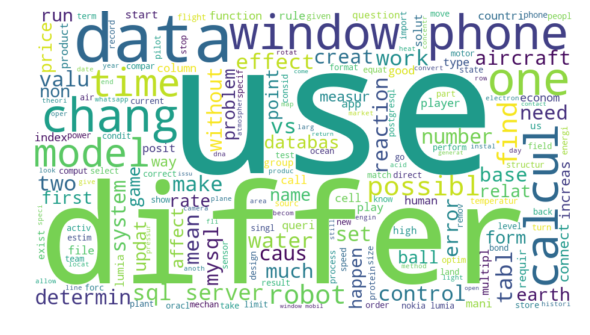

In [33]:
WordCloudFunction("PreprocessedData",Dataset)

In [13]:
#making a list to keep all Question,Title and TitleAndQuestion Data for further processing
Question_List =[]
Title_List =[]
TitleAndQuestionList =[]
TitleQuestionListTopic=[]
Topic_List =[]
ID_List =[]
for ID in tq.tqdm(range(len(Dataset))):
    try:
        Question_List.append(Dataset['Questions'][ID])
        Title_List.append(Dataset['Title'][ID])
        TitleAndQuestionList.append(Dataset['TitleAndQuestions'][ID])
        Topic_List.append(Dataset['Topic'][ID])
        TitleQuestionListTopic.append(Dataset['TitleQuestionAndTopicCorpus'][ID])
        ID_List.append(ID)
    except KeyError:
        pass  
    
Title_Text_Dictionary =dict(zip(ID_List,Title_List))    
Question_Text_Dictionary=dict(zip(ID_List,Question_List))
TitleAndQuestion_Text_Dictionary=dict(zip(ID_List,TitleAndQuestionList))

In [14]:
Dataset_Raw_Question_List =[]
Dataset_Raw_Title_List =[]
Dataset_Raw_TitleAndQuestionList =[]
Dataset_Raw_ID_List =[]
for ID in tq.tqdm(range(len(Dataset_Raw))):
    try:
        Dataset_Raw_Question_List.append(Dataset_Raw['Questions'][ID])
        Dataset_Raw_Title_List.append(Dataset_Raw['Title'][ID])
        Dataset_Raw_TitleAndQuestionList.append(Dataset_Raw['TitleAndQuestions'][ID])
        Dataset_Raw_TitleAndQuestionList.append(ID)
    except KeyError:
        pass  

### Clustering All Data Points using K-Means Algoritham

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer_Title = TfidfVectorizer(min_df=10)
TFIDF_vectorizer_Questions = TfidfVectorizer(min_df=10)

TFIDF_vectorizer_TitleAndQuestions = TfidfVectorizer(min_df=10)

TFIDF_Title_Fit=TFIDF_vectorizer_Title.fit(Title_List)
TFIDF_Title_Transform=TFIDF_Title_Fit.transform(Title_List)

TFIDF_Questions=TFIDF_vectorizer_Questions.fit(Question_List)
TFIDF_Questions_Transform=TFIDF_Questions.transform(Question_List)

TFIDF_TitleAndQuestionList_Vec =TFIDF_vectorizer_TitleAndQuestions.fit(TitleAndQuestionList)
TFIDF_TitleAndQuestionList_Vec_Transform=TFIDF_TitleAndQuestionList_Vec.transform(TitleAndQuestionList)


In [16]:
#Horizontal stacking of Title,Questions and TitleQuestion vectorizer 
from scipy.sparse import hstack 
Corpus_Vector=hstack((TFIDF_Title_Transform,TFIDF_Questions_Transform,TFIDF_TitleAndQuestionList_Vec_Transform))

In [17]:
print(Corpus_Vector.shape)

(32179, 18565)


In [18]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10, max_iter=300).fit(Corpus_Vector)

In [12]:
#Saving the KMeans Model into pickle file
Kmeans_Model = open("KMeansModel", "wb")
pickle.dump(kmeans, Kmeans_Model)
Kmeans_Model.close()

In [19]:
Cluster_Dictionary={}
for i in tq.tqdm(range(0,10)):
    Cluster_grouped_ID=[]
    for j in range(len(kmeans.labels_)):
        if(i==kmeans.labels_[j]):
            Cluster_grouped_ID.append(j)
    Cluster_Dictionary[i]= Cluster_grouped_ID            

In [182]:
#Loading Cluster Dictionary to Pickle file
ClusterDictionary = open("ClusterDictionary.pkl", "wb")
pickle.dump(Cluster_Dictionary, ClusterDictionary)
ClusterDictionary.close()

In [20]:
#Data Points in each cluster

for i in tq.tqdm(range(0,10)):
    print("{0} cluster having {1} points".format(i,len(Cluster_Dictionary[i])))


0 cluster having 1444 points
1 cluster having 2769 points
2 cluster having 1823 points
3 cluster having 2004 points
4 cluster having 465 points
5 cluster having 798 points
6 cluster having 1275 points
7 cluster having 18930 points
8 cluster having 1010 points
9 cluster having 1661 points



In [ ]:
Inertia=[]
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Corpus_Vector)
    Inertia.append(kmeans.inertia_)
    print("Cluster {0} having inertia {1}".format(i,kmeans.inertia_))
plt.plot(range(1,20),Inertia)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia") 

#### Elbow Curve

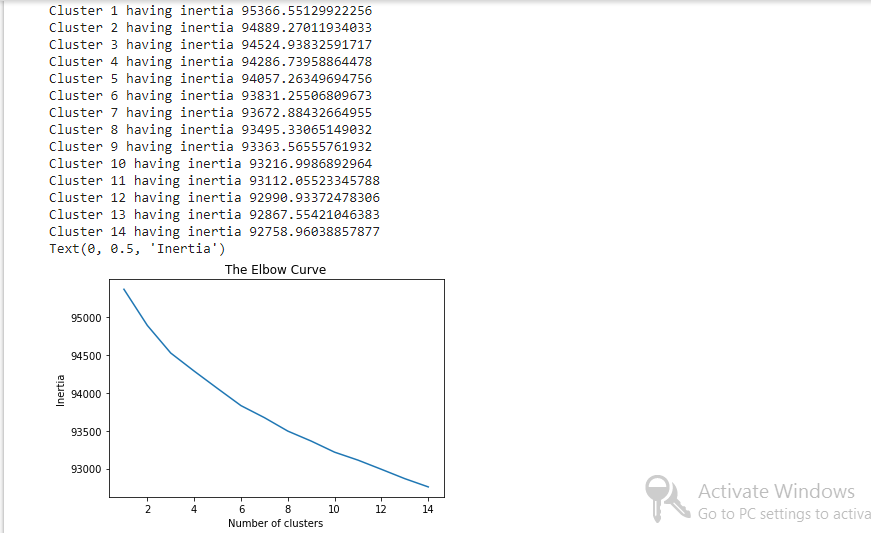

In [18]:
print(kmeans.cluster_centers_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.76249783e-04
  0.00000000e+00 0.00000000e+00]
 [6.33255537e-04 4.95616510e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.19994165e-04 7.19402851e-04 ... 0.00000000e+00
  0.00000000e+00 8.79220287e-04]
 ...
 [0.00000000e+00 2.54095383e-04 1.19243050e-03 ... 1.99493868e-04
  0.00000000e+00 0.00000000e+00]
 [4.10433668e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.94954526e-04 ... 3.81222997e-05
  0.00000000e+00 0.00000000e+00]]


In [28]:
print("Inter Cluster distance",kmeans.inertia_)

Inter Cluster distance 93274.51388342568


### Observations

1.Taking QuestionandTitle combined corpus,converting them using TFIDF vectorizer (which holds semantic meaning) to get vector representation for each document in the corpus.

2.Grouped all data points into 10 clusters using k-means algoritham.When there is query vector we can seach within the cluster to get most semantic similar posts with low latency


## Embedding Techniques

1.Universal Setence Encoder Model(USE)+Cosine Similarity

2.Sentence Transformers(SBert)+Cosine Similarity

3.Embeddings from Language Models(ELMO) +Cosine Similarity

### Universal Sentence Encoder Model

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
USE_Model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
model_path = r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model"
tf.saved_model.save(USE_Model, model_path)

In [17]:
# Load USE model
USE_Model = tf.saved_model.load(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model")

In [ ]:
Start =time.time()
USE_Model_Embedding_Title=[]
USE_Model_Embedding_Questions= []
USE_Model_Embedding_QuestionsAndTitle= []
USE_Model_Embedding_Topic=[]
ID_List =[]
for ID in tq.tqdm(range(len(Dataset))):
    try:
        Sent =Dataset['Title'][ID]
        Question =Dataset['Questions'][ID]
        TitleAndQuestion =Dataset['TitleAndQuestions'][ID]
        Topic =Dataset['Topic'][ID]
        #Converting title,Question and QuestionAndTitle column into nd array
        USE_Model_Embedding_Title.append( tf.make_ndarray(tf.make_tensor_proto(USE_Model([Sent]))).reshape(-1,1))
        USE_Model_Embedding_Questions.append( tf.make_ndarray(tf.make_tensor_proto(USE_Model([Question]))).reshape(-1,1))
        USE_Model_Embedding_QuestionsAndTitle.append( tf.make_ndarray(tf.make_tensor_proto(USE_Model([TitleAndQuestion]))).reshape(-1,1))
        USE_Model_Embedding_Topic.append( tf.make_ndarray(tf.make_tensor_proto(USE_Model([Topic]))).reshape(-1,1))
        ID_List.append(ID)
    except KeyError:
        print("Keyerror",ID)
        pass

USE_Model_Embedding_Title_Dic =dict(zip(ID_List,USE_Model_Embedding_Title))
USE_Model_Embedding_Questions_Dic =dict(zip(ID_List,USE_Model_Embedding_Questions))
USE_Model_Embedding_QuestionsAndTitle_Dic=dict(zip(ID_List,USE_Model_Embedding_QuestionsAndTitle))
USE_Model_Embedding_Topic =dict(zip(ID_List,USE_Model_Embedding_Topic))
#Loading vector embedding into pickle file
USE_Model_Title_dic_Vec = open("USE_Model_Title_dic_Vec.pkl", "wb")
USE_Model_Question_dic_vec =open("USE_Model_Question_dic_vec.pkl", "wb")
USE_Model_QuestionsAndTitle_dic_Vec = open("USE_Model_QuestionsAndTitle_dic_Vec.pkl", "wb")
USE_Model_Topic_dic_Vec=open("USE_Model_Topic_dic_Vec.pkl", "wb")
pickle.dump(USE_Model_Embedding_Title_Dic, USE_Model_Title_dic_Vec)
pickle.dump(USE_Model_Embedding_Questions_Dic, USE_Model_Question_dic_vec)
pickle.dump(USE_Model_Embedding_QuestionsAndTitle_Dic, USE_Model_QuestionsAndTitle_dic_Vec)
pickle.dump(USE_Model_Embedding_Topic, USE_Model_Topic_dic_Vec)
USE_Model_Title_dic_Vec.close()
USE_Model_Question_dic_vec.close()
USE_Model_QuestionsAndTitle_dic_Vec.close()
USE_Model_Topic_dic_Vec.close()
end =time.time()
print(end-Start)

### SBert Model

In [4]:
from sentence_transformers import SentenceTransformer
SBert = SentenceTransformer('bert-base-nli-mean-tokens')

In [9]:
ID_List =[]
SBert_Embedding_Title =[]
SBert_Embedding_Questions =[]
SBert_Embedding_QuestionsAndTitle=[]
SBert_Embedding_Topic=[]
Start =time.time()
for ID in tq.tqdm(range(len(Dataset))):
    try:
        Sent =Dataset['Title'][ID]
        Question =Dataset['Questions'][ID]
        TitleAndQuestion =Dataset['TitleAndQuestions'][ID]
        Topic =Dataset['Topic'][ID]
        SBert_Embedding_Title.append((np.asarray(SBert.encode([Sent])).reshape(-1,1))) 
        SBert_Embedding_Questions.append((np.asarray(SBert.encode([Question])).reshape(-1,1)))
        SBert_Embedding_QuestionsAndTitle.append((np.asarray(SBert.encode([TitleAndQuestion])).reshape(-1,1)))
        SBert_Embedding_Topic.append((np.asarray(SBert.encode([Topic])).reshape(-1,1)))
        ID_List.append(ID)
    except KeyError:
        print("Keyerror",ID)
        pass

SBert_Embedding_Title_Dic =dict(zip(ID_List,SBert_Embedding_Title))
SBert_Embedding_Questions_Dic =dict(zip(ID_List,SBert_Embedding_Questions))
SBert_Embedding_QuestionsAndTitle_Dic=dict(zip(ID_List,SBert_Embedding_QuestionsAndTitle))
SBert_Embedding_Topic_Dic=dict(zip(ID_List,SBert_Embedding_Topic))

SBert_Model_Title_dic_Vec = open("SBert_Model_Title_dic_Vec.pkl", "wb")
SBert_Model_Question_dic_vec =open("SBert_Model_Question_dic_vec.pkl", "wb")
SBert_Model_QuestionsAndTitle_dic_Vec = open("SBert_Model_QuestionsAndTitle_dic_Vec.pkl", "wb")
SBert_Model_Topic_dic_Vec = open("SBert_Model_Topic_dic_Vec.pkl", "wb")

pickle.dump(SBert_Embedding_Title_Dic, SBert_Model_Title_dic_Vec)
pickle.dump(SBert_Embedding_Questions_Dic, SBert_Model_Question_dic_vec)
pickle.dump(SBert_Embedding_QuestionsAndTitle_Dic, SBert_Model_QuestionsAndTitle_dic_Vec)
pickle.dump(SBert_Embedding_Topic_Dic, SBert_Model_Topic_dic_Vec)
SBert_Model_Title_dic_Vec.close()
SBert_Model_Question_dic_vec.close()
SBert_Model_QuestionsAndTitle_dic_Vec.close()  
SBert_Model_Topic_dic_Vec.close()
end =time.time()
print(end-Start)  


24549.04576230049


#### ELMO Model

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
Elmo_Model = hub.KerasLayer("https://tfhub.dev/google/elmo/3")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
ID_List =[]
ELMO_Embedding_Title =[]
ELMO_Embedding_Questions =[]
ELMO_Embedding_QuestionsAndTitle=[]
ELMO_Embedding_Topic=[]
Start =time.time()
for ID in tq.tqdm(range(len(Dataset))):
    try:
        Sent =Dataset['Title'][ID]
        Sentence =np.asarray([Sent])
        Tensor_Sentence =tf.convert_to_tensor(Sentence)
        ELMO_Embedding_Title.append(np.asarray(Elmo_Model(Tensor_Sentence)).reshape(-1,1))
        Question =Dataset['Questions'][ID]
        Question_Sentence =np.asarray([Question])
        Tensor_Question =tf.convert_to_tensor(Question_Sentence)
        ELMO_Embedding_Questions.append(np.asarray(Elmo_Model(Tensor_Question)).reshape(-1,1))
        TitleAndQuestion =Dataset['TitleAndQuestions'][ID]
        QustionAndTitle_Sentence =np.asarray([TitleAndQuestion])
        Tensor_QandT =tf.convert_to_tensor(QustionAndTitle_Sentence)
        ELMO_Embedding_QuestionsAndTitle.append(np.asarray(Elmo_Model(Tensor_QandT)).reshape(-1,1))
        Topic =Dataset['Topic'][ID]
        Topic_Sentence =np.asarray([Topic])
        Tensor_Topic =tf.convert_to_tensor(Topic_Sentence)
        ELMO_Embedding_Topic.append(np.asarray(Elmo_Model(Tensor_Topic)).reshape(-1,1))
        ID_List.append(ID)
    except KeyError:
        print("Keyerror",ID)
        pass

ELMO_Embedding_Title_Dic =dict(zip(ID_List,ELMO_Embedding_Title))
ELMO_Embedding_Questions_Dic =dict(zip(ID_List,ELMO_Embedding_Questions))
ELMO_Embedding_QuestionsAndTitle_Dic=dict(zip(ID_List,ELMO_Embedding_QuestionsAndTitle))
ELMO_Embedding_Topic_Dic=dict(zip(ID_List,ELMO_Embedding_Topic))
Title_pickle ='ELMO_Model_Title_dic_Vec'+"."+"pkl"
Question_Pickle='ELMO_Model_Question_dic_Vec'+"."+"pkl"
ELMO_Model_Title_dic_Vec = open(Title_pickle, "wb")
ELMO_Model_Question_dic_vec =open(Question_Pickle, "wb")
ELMO_Model_QuestionsAndTitle_dic_Vec = open("ELMO_Model_QuestionsAndTitle_dic_Vec.pkl", "wb")
pickle.dump(ELMO_Embedding_Title_Dic, ELMO_Model_Title_dic_Vec)
pickle.dump(ELMO_Embedding_Questions_Dic, ELMO_Model_Question_dic_vec)
pickle.dump(ELMO_Embedding_QuestionsAndTitle_Dic, ELMO_Model_QuestionsAndTitle_dic_Vec)
ELMO_Model_Title_dic_Vec.close()
ELMO_Model_Question_dic_vec.close()
end =time.time()
print(end-Start)  

### Calculating the CosineSimilarity 

In [21]:
def SemanticSimilarityScore(Sentence,Query_Vector,Title_Vector_Dictionary,Question_Vector_Dictionary,Topic_Vector_Dictionary,QuestionAndTitle_Vector_Dictionary,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary):
    SimilarityDict={}
    for key in tq.tqdm(ClusterPoints):
        Vector_Similarity_Title = 1 - spatial.distance.cosine(Query_Vector,Title_Vector_Dictionary[key])
        Vector_Similarity_Question = 1 - spatial.distance.cosine(Query_Vector,Question_Vector_Dictionary[key])
        Vector_Similarity_TitleAndQuestion =1 - spatial.distance.cosine(Query_Vector,QuestionAndTitle_Vector_Dictionary[key])
        
        #Adding Cosine Score from Title,Question and  TitleQuestion
       
        SimilarityDict[key] =Vector_Similarity_Title+Vector_Similarity_Question+Vector_Similarity_TitleAndQuestion
    
    sorted_dic = sorted(SimilarityDict.items(), key=lambda kv: kv[1],reverse=True)[:10]
    return SimilarityDict

### Results  to get top 10 Similar Posts from Embedding Techniques

### Results Using UniversalSentenceEncoder

In [30]:
import pickle
#Loading Vectors processed using Universal Sentence Encoder
USE_Title =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model\USE_Model_Title_dic_Vec.pkl","rb")
USE_Questions =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model\USE_Model_Question_dic_vec.pkl","rb")
USE_Topic =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model\USE_Model_Topic_dic_vec.pkl","rb")
USE_QuestionAndTitle =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\USE_Model\USE_Model_QuestionsAndTitle_dic_Vec.pkl","rb")
USE_Title_Vectors=pickle.load(USE_Title)
USE_Question_Vectors =pickle.load(USE_Questions)
USE_Topic_Vectors =pickle.load(USE_Topic)
USE_QuestionAndTitle=pickle.load(USE_QuestionAndTitle)

In [120]:
Start_time =time.time()

Query_Vector= tf.make_ndarray(tf.make_tensor_proto(USE_Model([Sentence]))).reshape(-1,1)
Use_SimilarityList=SemanticSimilarityScore(Sentence,Query_Vector,USE_Title_Vectors,USE_Question_Vectors,USE_Topic_Vectors,USE_QuestionAndTitle,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)

print("--- %s seconds ---" % (time.time() - Start_time))


Similarity 2.0793302059173584
--------------------------------------------------
TITLE : sql server 2005 deadlock error 3930
Similarity 2.077984094619751
--------------------------------------------------
TITLE : SQL Server 2016 SP2 - ONLINE REBUILD DEADLOCKed Itself - is this a bug?
Similarity 1.9091203808784485
--------------------------------------------------
TITLE : sql server transactional - replication - the internal procedures often deadlock with user processes
Similarity 1.7593512535095215
--------------------------------------------------
TITLE : Queries involved in deadlock
Similarity 1.7491782903671265
--------------------------------------------------
TITLE : SQL Server 2012 Unable to Utilize Defined Amount of Locks
Similarity 1.7359185218811035
--------------------------------------------------
TITLE : Attaching database to the SQL server
Similarity 1.7295295596122742
--------------------------------------------------
TITLE : Is BulkCopy available for SQL-Server 2012
Sim

### Observations

1.Universal Sentence Encoder is pretrained model trained on wide variety of data and  universal-sentence-encoder model is trained with a deep averaging network (DAN) encoder.

2.Each sentence represents 512 vector dimensions 

3.The Processing speed is very less and it gives fantastic results with less amount of data.

4.Consumes around 1.5 GB memory while training the model and Getting the Vector representation for each sentence

5.USE Gives very good results with less training data

### Results Using Sbert

In [27]:
import pickle

SBert_Title =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\SBert_Model\SBert_Model_Title_dic_Vec.pkl","rb")
SBert_Questions =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\SBert_Model\SBert_Model_Question_dic_vec.pkl","rb")
SBert_TitleAndQuestions =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\SBert_Model\SBert_Model_QuestionsAndTitle_dic_Vec.pkl","rb")
SBert_Topic =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\SBert_Model\SBert_Model_Topic_dic_Vec.pkl","rb")

SBert_Title_Vectors=pickle.load(SBert_Title)
SBert_Question_Vectors =pickle.load(SBert_Questions)
SBert_TitleAndQuestions_Vectors=pickle.load(SBert_TitleAndQuestions)
SBert_Topic_Vectors=pickle.load(SBert_Topic)

In [103]:
Start_time =time.time()

Query_Vector= np.asarray(SBert.encode(Sentence)).reshape(-1,1)
SBert_SimilarityList=SemanticSimilarityScore(Sentence,Query_Vector,SBert_Title_Vectors,SBert_Question_Vectors,SBert_Topic_Vectors,SBert_TitleAndQuestions_Vectors,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)

print("--- %s seconds ---" % (time.time() - Start_time))


Similarity 2.433806002140045
--------------------------------------------------
TITLE : Installing SQL Server 2012 error
Similarity 2.368663489818573
--------------------------------------------------
TITLE : SQL Server 2019 CTP 2.1 on Ubuntu fails after powering off
Similarity 2.361669957637787
--------------------------------------------------
TITLE : How to trouble shoot intermittently slow SQL Server
Similarity 2.361489474773407
--------------------------------------------------
TITLE : sql server transactional - replication - the internal procedures often deadlock with user processes
Similarity 2.3545417189598083
--------------------------------------------------
TITLE : Can you prevent more than X number of rows being updated in SQL Server?
Similarity 2.3390188813209534
--------------------------------------------------
TITLE : An SQL Server 2008 R2 based program fails when updating stored procedures?
Similarity 2.337853193283081
-------------------------------------------------

### Observations

1.SBert is pretrained  sentence transformer model used in natural language processing framework

2.Vector dimension for each sentence is 768 .SBert is very slow during the training process.

3.It Gives good results when the training contains huge data.As Vector size is high ,it took lot of time to process

4.It is predicting the simialr sentences with expected time within the defined cluster

### Results using ELMO

In [28]:
#Loading ELMO Vectors
ELMO_Title =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\ELMO_Model\ELMO_Model_Title_dic_Vec.pkl","rb")
ELMO_Questions =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\ELMO_Model\ELMO_Model_Question_dic_Vec.pkl","rb")
ELMO_TitleAndQuestions =open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\ELMO_Model\ELMO_Model_QuestionsAndTitle_dic_Vec.pkl","rb")
ELMO_Topic=open(r"C:\Users\Reddivari Lalitha\Downloads\OwnCaseStudy\ELMO_Model\ELMO_Model_Topic_dic_Vec.pkl","rb")

ELMO_Title_Vectors=pickle.load(ELMO_Title)
ELMO_Question_Vectors =pickle.load(ELMO_Questions)
ELMO_TitleAndQuestion_Vectors=pickle.load(ELMO_TitleAndQuestions)
ELMO_Topic=pickle.load(ELMO_Topic)

In [102]:
import time
Start_time =time.time()

SentenceArray =np.asarray([Sentence])
Tensor_Sentence =tf.convert_to_tensor(SentenceArray)
Query_Vector =np.asarray(Elmo_Model(Tensor_Sentence)).reshape(-1,1)
ELOM_Similarity=SemanticSimilarityScore(Sentence,Query_Vector,ELMO_Title_Vectors,ELMO_Question_Vectors,ELMO_Topic,ELMO_TitleAndQuestion_Vectors,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)

print("--- %s seconds ---" % (time.time() - Start_time))


Similarity 2.1190207600593567
--------------------------------------------------
TITLE : Why Isn't the SQL Server Agent Service Set to Automatic Startup by Default?
Similarity 2.116840362548828
--------------------------------------------------
TITLE : An SQL Server 2008 R2 based program fails when updating stored procedures?
Similarity 2.103916883468628
--------------------------------------------------
TITLE : SQL Server 2008 log directory has too much dump file
Similarity 2.093343734741211
--------------------------------------------------
TITLE : SQL Server 2016 SP2 - ONLINE REBUILD DEADLOCKed Itself - is this a bug?
Similarity 2.087089776992798
--------------------------------------------------
TITLE : SQL Server 2005 Blocking Issue
Similarity 2.060544729232788
--------------------------------------------------
TITLE : SQL Server 2008R2 Logon failed
Similarity 2.059691369533539
--------------------------------------------------
TITLE : SQL Server 2012 Downgraded from Enterprise t

### Observations

1.ELMo word representations take the entire input sentence into equation for calculating the word embeddingsis pretrained model.

2.The architecture  uses a character-level convolutional neural network (CNN) to represent words of a text string into raw word vectors.

3.ELMO gives three dimension tensor with vector dimension 1024(1,1,1024).ELMo word representations take the entire input sentence into equation for calculating the word embeddings.

4.ELMO requires lot of training data,compared to USE and Sber,ELMo is pretty slow and it consumes lot of system resources.

5.ELMO gives decent results,it took more processing time compared to USE and SBert

### SeachEngine For Semantic Similarity Posts

In [22]:
def SBert_SemantichScore(Sentence,ClusterPoints):
    
    Query_Vector= np.asarray(SBert.encode(Sentence)).reshape(-1,1)
    SBert_SimilarityDict=SemanticSimilarityScore(Sentence,Query_Vector,SBert_Title_Vectors,SBert_Question_Vectors,SBert_Topic_Vectors,SBert_TitleAndQuestions_Vectors,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)
    
    return SBert_SimilarityDict

In [23]:
def ELMO_SemanticScore(Sentence,ClusterPoints):
    
    SentenceArray =np.asarray([Sentence])
    Tensor_Sentence =tf.convert_to_tensor(SentenceArray)
    Query_Vector =np.asarray(Elmo_Model(Tensor_Sentence)).reshape(-1,1)
    ELOM_SimilarityDict=SemanticSimilarityScore(Sentence,Query_Vector,ELMO_Title_Vectors,ELMO_Question_Vectors,ELMO_Topic,ELMO_TitleAndQuestion_Vectors,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)
    
    return ELOM_SimilarityDict

In [24]:
def USE_SemanticScore(Sentence,ClusterPoints):
    
    Query_Vector= tf.make_ndarray(tf.make_tensor_proto(USE_Model([Sentence]))).reshape(-1,1)
    Use_SimilarityDict=SemanticSimilarityScore(Sentence,Query_Vector,USE_Title_Vectors,USE_Question_Vectors,USE_Topic_Vectors,USE_QuestionAndTitle,ClusterPoints,Title_Text_Dictionary,Question_Text_Dictionary)
    
    return Use_SimilarityDict

In [33]:
def SearchEngine(Sentence):
    
    Final_SimilarScore_Dict ={}

    Q1=TFIDF_Title_Fit.transform([Sentence])
    Q2=TFIDF_Questions.transform([Sentence])
    Q3=TFIDF_TitleAndQuestionList_Vec.transform([Sentence])
    
    Query_TFIDF_Vec=hstack((Q1,Q2,Q3))
    prediction =kmeans.predict(Query_TFIDF_Vec)

    #Keeping all data points into single dictionary 
    ClusterPoints=Cluster_Dictionary[int(prediction)]
    
    #Calling Respective models and get semantic Scores
    Use_SimilarityDict=USE_SemanticScore(Sentence,ClusterPoints)
    ELOM_SimilarityDict=ELMO_SemanticScore(Sentence,ClusterPoints)
    SBert_SimilarityDict=SBert_SemantichScore(Sentence,ClusterPoints)
    
    #Combining the similarity scores from all three pretrained models
    for key in Use_SimilarityDict:
        Final_SimilarScore_Dict[key]=Use_SimilarityDict[key]+(ELOM_SimilarityDict[key])+(SBert_SimilarityDict[key])
        
    #Retriving the top 10 Similar Titles and Questions Posts
    Final_SimilaritySorted_List =  sorted(Final_SimilarScore_Dict.items(), key=lambda kv: kv[1],reverse=True)[:10]  
    
    for i in Final_SimilaritySorted_List:
        Index =i[0]
        print("SimilarityScore:",i[1])
        print("TITLE :",Dataset_Raw_Title_List[Index])
        #print("QUESTION :",Dataset_Raw_Question_List[Index])
        #print("-"*50)          

#### QuerySentence

In [34]:
Start_time =time.time()

Sentence ="SQL server deadlock issue"

SearchEngine(Sentence)

print("--- %s seconds ---" % (time.time() - Start_time)) 


SimilarityScore: 5.92634192109108
TITLE : sql server 2005 deadlock error 3930
SimilarityScore: 5.892218708992004
TITLE : SQL Server 2016 SP2 - ONLINE REBUILD DEADLOCKed Itself - is this a bug?
SimilarityScore: 5.784888505935669
TITLE : sql server transactional - replication - the internal procedures often deadlock with user processes
SimilarityScore: 5.582766056060791
TITLE : How to trouble shoot intermittently slow SQL Server
SimilarityScore: 5.475353002548218
TITLE : Disabled SQL Server Endpoint - now I cannot login
SimilarityScore: 5.457799911499023
TITLE : Why Isn't the SQL Server Agent Service Set to Automatic Startup by Default?
SimilarityScore: 5.408241480588913
TITLE : Can you prevent more than X number of rows being updated in SQL Server?
SimilarityScore: 5.39473432302475
TITLE : Queries involved in deadlock
SimilarityScore: 5.338998168706894
TITLE : Error when trying to start Microsoft SQL Server 2008 instance from SQL Server Configuration Manager
SimilarityScore: 5.31346097

### Conclusion

1.Universal sentence Encoder model performed well with very less data compared to other pretrained models like SBert and ELMO.

2.Sbert(Sentence transformers) model gives excellent results when i used only DBA dataset which is having more size and 
queried DBA related things.It's almost gives expected results but more time for processing.

3.Elmo gives decent results,but the vector size is high and took lot of processing time.

4.Once data points grouped using K-means algoritham,we are getting results using all pretrained models within expected time with low latency

5.At final step,combined the similarity score from all three pretarined models and returning the similarity Title,Question and Similarity score